In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

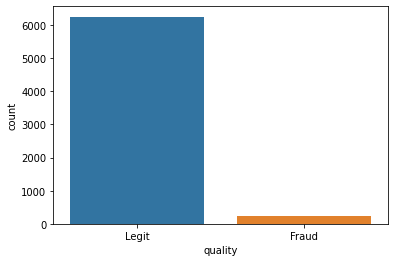

In [4]:
sns.countplot( x= 'quality', data = df)

In [5]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

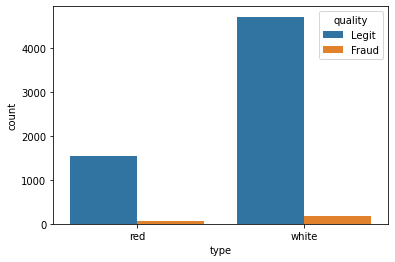

In [6]:
sns.countplot( x= 'type', data = df, hue = 'quality')

In [7]:
reds = df[df['type'] == 'red']
whites = df[df['type'] == 'white']

In [8]:
reds[reds['quality'] == 'Fraud']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,Fraud,red
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,Fraud,red
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,Fraud,red
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,Fraud,red
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,Fraud,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,Fraud,red
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,Fraud,red
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,Fraud,red
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,Fraud,red


In [10]:
len(whites[whites['quality'] == 'Fraud'])/len(whites)*100

3.7362188648427925

In [11]:
len(reds[reds['quality'] == 'Fraud'])/len(reds)*100

3.9399624765478425

In [12]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud': 1})

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [17]:
df.corr()['Fraud'][: -1].sort_values() #correlations of frauf wrt various features

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

<AxesSubplot:>

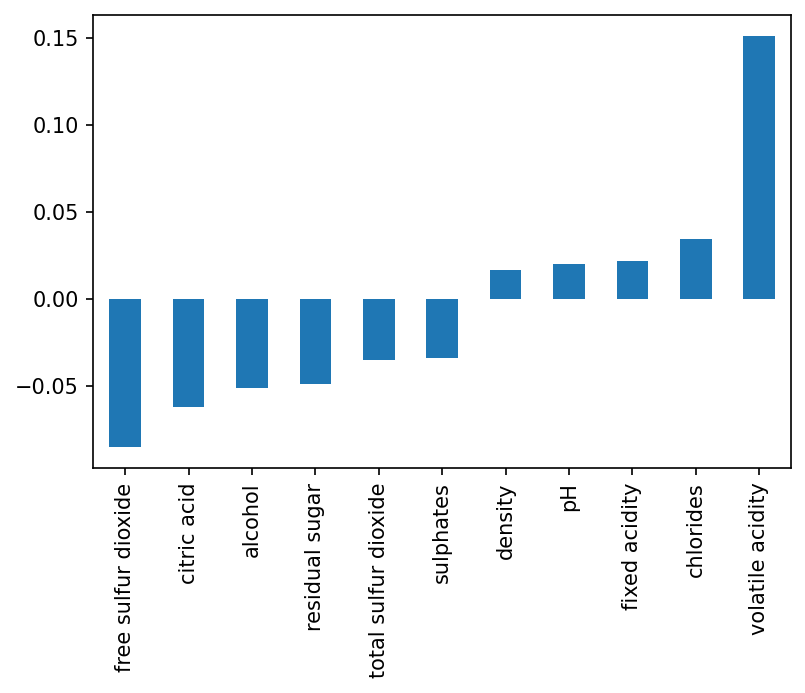

In [19]:
plt.figure(dpi =150)
df.corr()['Fraud'][: -1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

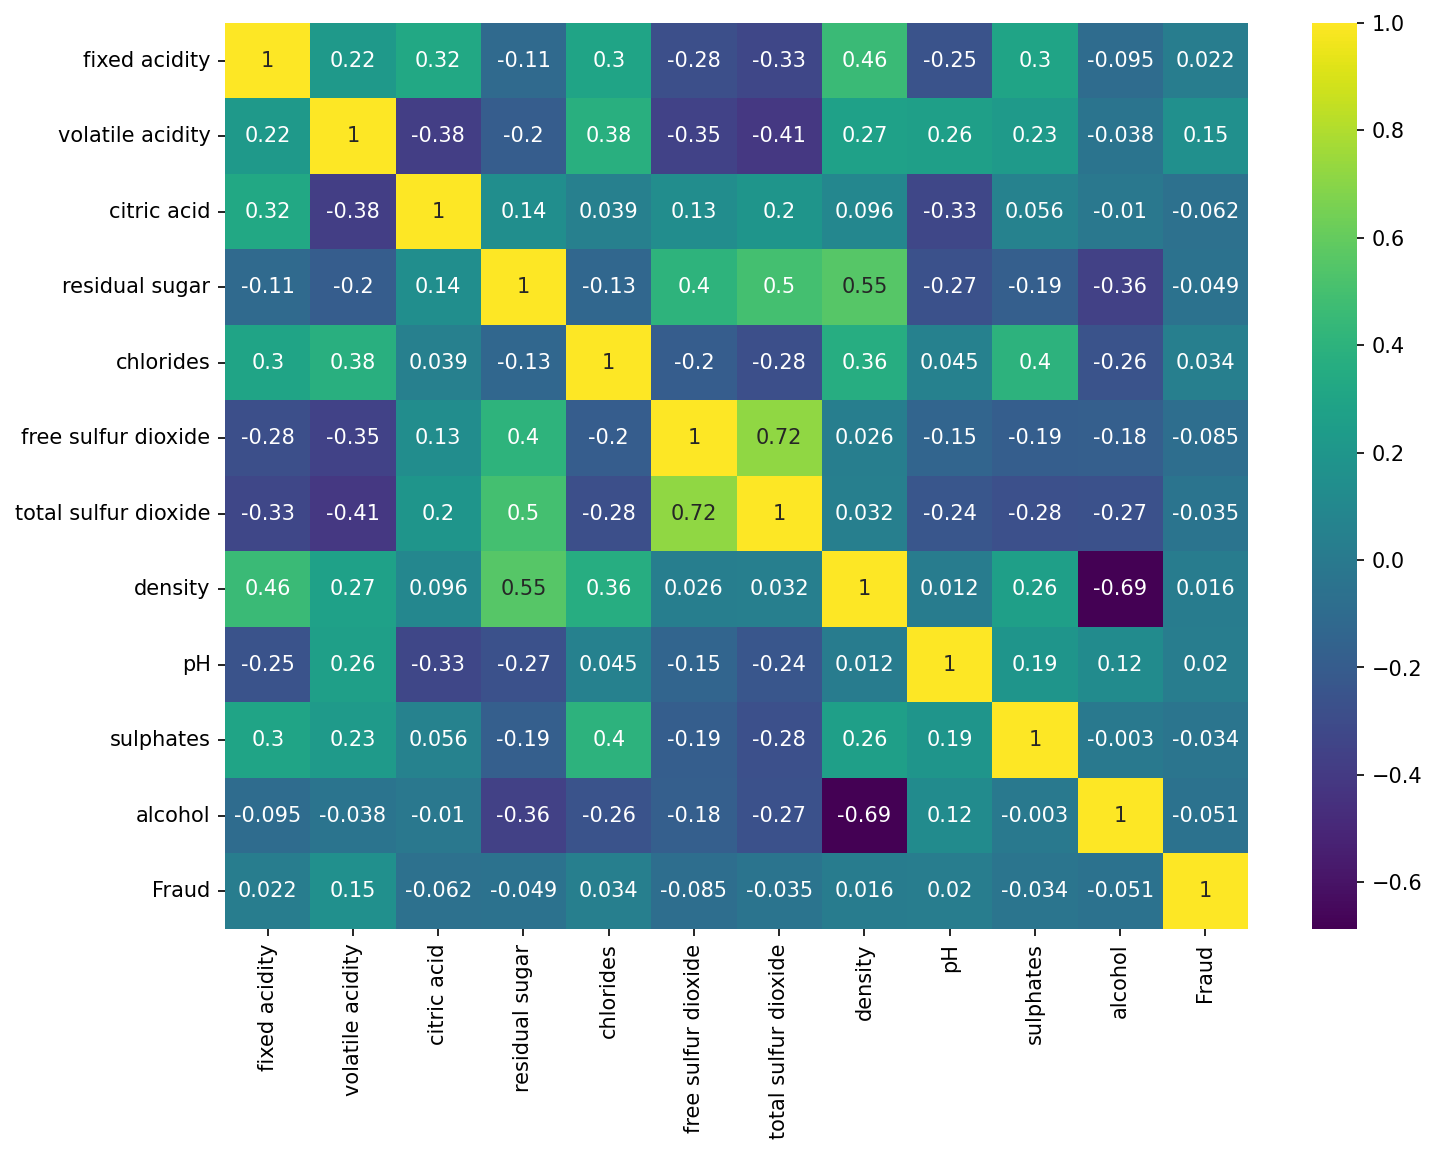

In [22]:
plt.figure(figsize=(11,8),dpi =150)
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

In [25]:
df = df.drop('Fraud', axis = 1)

KeyError: "['Fraud'] not found in axis"

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [27]:
df['type'] = pd.get_dummies(df['type'], drop_first = True) #Encoding

In [28]:
X = df.drop('quality', axis =1)

In [29]:
y = df['quality']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.shape

(6497, 13)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 101)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)

In [37]:
scaled_X_test = scaler.transform(X_test)

In [38]:
from sklearn.svm import SVC

In [41]:
svc = SVC(class_weight = 'balanced')

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,1]}

In [44]:
grid_model =GridSearchCV(svc, param_grid)

In [45]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [46]:
grid_model.best_params_

{'C': 1}

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [48]:
grid_preds = grid_model.predict(scaled_X_test)

In [49]:
confusion_matrix(y_test, grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


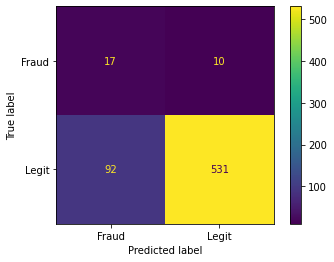

In [50]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [51]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

